# The Analysis of Supply Chain Data <br>
##### By Abbas Jawad <br>


##### In this dataset, we will use data science tools to clean, analyze, interpret, and generate action plans accordingly. The purpose of this exercise is to showcase competencies in tools, contextualization, and insight generation. 


First, we will need to import all of the necessesary dependencies to aid in our workflow. 
___

In [55]:

import os #For operating System tayloring
import kagglehub #For using library to download datasets directly from Kaggle API
import pandas as pd #Commonly used library to analayze and visualize datasets
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Download latest version
path = kagglehub.dataset_download("amirmotefaker/supply-chain-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Abbas Jawad\.cache\kagglehub\datasets\amirmotefaker\supply-chain-dataset\versions\1


Then we will need to create a variable to pull the dataset from the allocated path in our local device. If statement implemented to for error-handling in path location:

In [56]:
csv_file_path = os.path.join(path, "supply_chain_data.csv")  
print("Full file path:", csv_file_path)

Full file path: C:\Users\Abbas Jawad\.cache\kagglehub\datasets\amirmotefaker\supply-chain-dataset\versions\1\supply_chain_data.csv


In [57]:
if os.path.exists(csv_file_path):  # os.path.exists requires os
    # Load the CSV into a pandas DataFrame
    data = pd.read_csv(csv_file_path, index_col=False, header=0)
    print(data.head())  # Display the first 5 rows
else:
    print("The file was not found at the specified path.")
    
    print("Full file path:", csv_file_path)
    
    
    
num_rows = len(data)


print("The total number of rows in this dataset is: ",num_rows)

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

---
Once we have verified that the file path is in working order, we can begin with processing our data.

Upon initial inspection, we can see the context of the data in the column headers.
Additionally, we can tell that this dataset has exactly 100 entries (i.e.) rows in the dataset. 
Based on the 10 times rule (count of entries should be 10X more than count of parameters), we find that this dataset is a bit small for meaningful assessment. 
However, for the sake of the exercise, we will continue with using the dataset for illustration purposes. 


At first glance, we can determine that this is sales data based on product type, costs, availabliliy and demographics. 

This dataset can be used to make determinations on what factors have relevant contributions to target variables (i.e. dependent variables). 
For example, If I wanted to approximate what signifcantly contributes to the Number of Products Sold, I can make use of a logisitic regression model and 
determine the P-value of each dependent variable. 

We do this to filter out any insignicant variables and allocate our focus/resources to the variables that "push the needle forward".
___


### Using OLS (Ordinary Least Squares) Model to determine how to predict number of products sold:
___
Let us define what our independents variables as well as our dependent variable will be.

Since we wish to predict the quanitity sold, we will use "Number of products sold" as our dependent variable.
All other varaibles will be deemed independent for the formulation. 


In [58]:
df = data
 
y = pd.to_numeric(df['Number of products sold'], errors='coerce')
X = df.drop(columns=['Number of products sold']).select_dtypes(include=['number'])

# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X) 

Explanation: OLS model only takes numbers as inputs, using the formula above will convert or filter out strings to avoid value errors. 
___

Once We have our variables defined, we will not plug them into the model:

In [59]:
model = sm.OLS(y, X).fit()

This model will generate the P-values of each independent variable, telling us which variables are significant in predicting the number of units sold.

In [60]:
p_values = [model.pvalues]

print(sorted(p_values))

[const                      0.312480
Price                      0.718958
Availability               0.348273
Revenue generated          0.878741
Stock levels               0.968486
Lead times                 0.902139
Order quantities           0.666582
Shipping times             0.345366
Shipping costs             0.483149
Lead time                  0.596034
Production volumes         0.064224
Manufacturing lead time    0.400706
Manufacturing costs        0.952430
Defect rates               0.291418
Costs                      0.820972
dtype: float64]


Assessment, all P-Values in this set are greater than 0.05, therefore would be deemed too weak against the null hypothesis (i.e. insignificant).

This can be due to the sample size being too small resulting in a potential Type II error due to insufficient sample size.
___

### Visualizaion:

We can use visualization tools from the same library to visualize the dataset and illustrate how these variables behave in relation to the dependent variable.
For simplicity, we will take the most significant variable (Production volumes - 0.064224) and add it to our graph



(100,)
(100,)


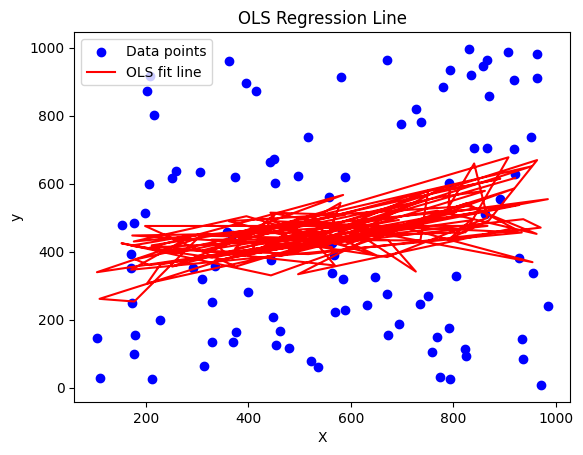

In [61]:
x = df['Production volumes']
# Make predictions
predictions = model.predict(X)

#We need to make sure the shape of each variable matches to prevent errors. 

print(x.shape) 
print(y.shape)

# Plot the data and the regression line
plt.scatter(x, y, label='Data points', color='blue')
plt.plot(x, predictions, color='red', label='OLS fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('OLS Regression Line')
plt.show()

Interpretation: With Production volumes being the most significant between all other variable, the render would indicate that there is at least some significance in determining the 
number of units sold., Since the X seems to increase as Y increases, we can determine that there is a positive relationship between the X and Y Variables.

In other words, the more production, the more units sold (duh).

### Conclusion

Whilst this has been a fun showcase of data manipulation and analysis, its important to always validate the quality and quantity of each data set.

Had there been more than 100 entries, the data could have yielded significantly more findings.

Action plans: Get more data if available. 